In [4]:
import pandas as pd

In [5]:
glaucoma_df=pd.read_csv('glaucoma_dataset.csv')
glaucoma_df.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,None,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma


In [6]:
glaucoma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             10000 non-null  object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

In [7]:
glaucoma_df=glaucoma_df.dropna()

In [8]:
glaucoma_df.isnull().sum()

Patient ID                                    0
Age                                           0
Gender                                        0
Visual Acuity Measurements                    0
Intraocular Pressure (IOP)                    0
Cup-to-Disc Ratio (CDR)                       0
Family History                                0
Medical History                               0
Medication Usage                              0
Visual Field Test Results                     0
Optical Coherence Tomography (OCT) Results    0
Pachymetry                                    0
Cataract Status                               0
Angle Closure Status                          0
Visual Symptoms                               0
Diagnosis                                     0
Glaucoma Type                                 0
dtype: int64

In [9]:
data_catplot=glaucoma_df[['Medical History','Family History','Diagnosis']]
data_catplot.head()

,Medical History,Family History,Diagnosis
0,Diabetes,No,No Glaucoma
1,Hypertension,No,No Glaucoma
2,Hypertension,No,No Glaucoma
3,None,No,No Glaucoma
4,Diabetes,No,No Glaucoma


In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt 


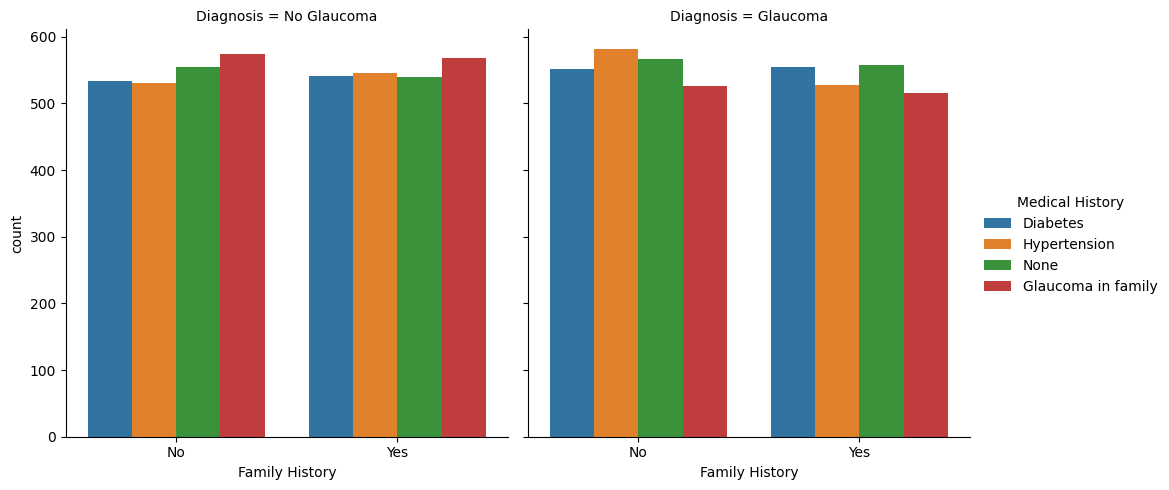

In [11]:
sns.catplot(data=data_catplot,x='Family History',col='Diagnosis',hue='Medical History',kind='count')

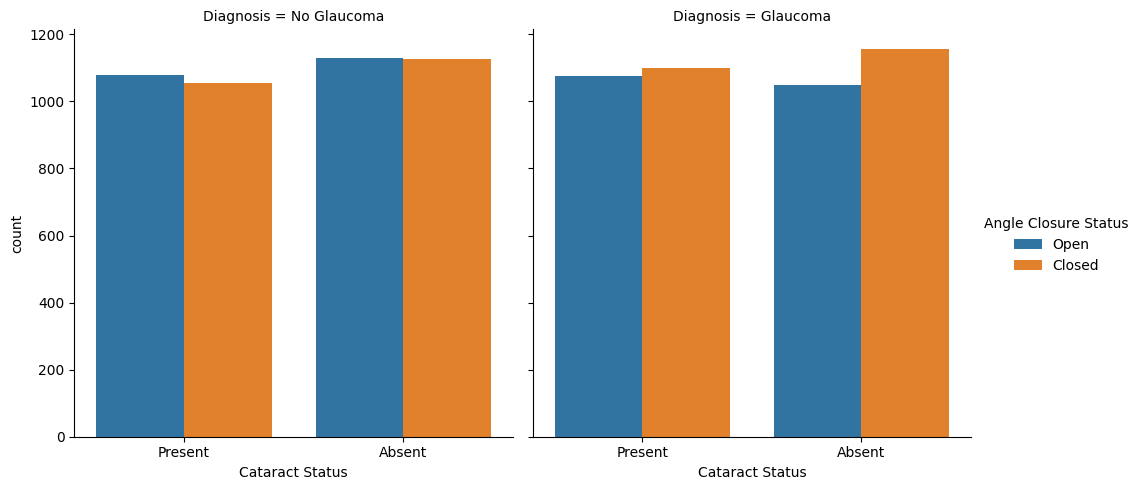

In [12]:
sns.catplot(data=glaucoma_df,x='Cataract Status',hue='Angle Closure Status',col='Diagnosis',kind='count')

In [13]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [14]:
label_encoder=LabelEncoder()

feature=glaucoma_df.drop(columns='Diagnosis')

for column in feature.columns:
    if feature[column].dtype=='object':
        feature[column]=label_encoder.fit_transform(feature[column])

X=feature
y=glaucoma_df['Diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)



In [15]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)


RandomForestClassifier()

In [16]:
y_pred=rf_model.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.4910680349676929

Text(0.5, 1.0, 'confusion metrix')

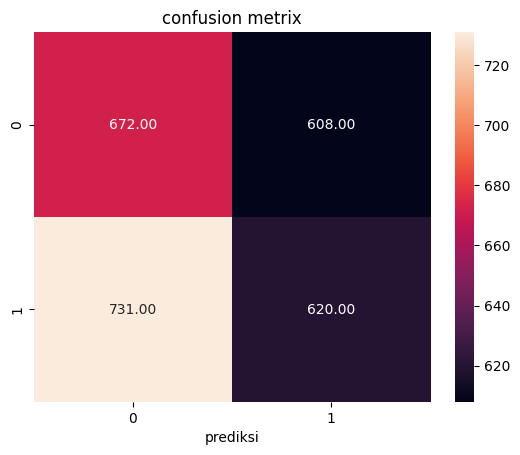

In [17]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.xlabel('prediksi')
plt.title('confusion metrix')


,precision,recall,f1-score,support
Glaucoma,0.504755,0.539062,0.521345,1280.000000
No Glaucoma,0.533228,0.498890,0.515488,1351.000000
accuracy,0.518434,0.518434,0.518434,0.518434
macro avg,0.518991,0.518976,0.518416,2631.000000
weighted avg,0.519376,0.518434,0.518337,2631.000000


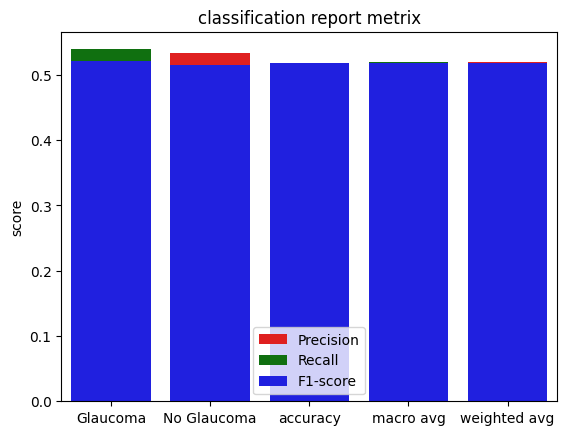

In [26]:
report=classification_report(y_test,y_pred,output_dict=True)
df_report=pd.DataFrame(report).transpose()
sns.barplot(x=df_report.index,y=df_report['precision'],label='Precision',color='red')
sns.barplot(x=df_report.index,y=df_report['recall'],label='Recall',color='green')
sns.barplot(x=df_report.index,y=df_report['f1-score'],label='F1-score',color='blue')
plt.title('classification report metrix')
plt.ylabel('score')
plt.legend()
df_report

In [20]:
data_scaled=MinMaxScaler()
for column in feature.columns:
    if feature[column].dtype=='int32':
        a=feature[column].values.reshape(-1,1)
        scaled=data_scaled.fit_transform(a)
        feature[column]=scaled.flatten()

X=feature
y=glaucoma_df['Diagnosis']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [21]:
kn_model=KNeighborsClassifier()
kn_model.fit(X_train,y_train)


KNeighborsClassifier()

In [22]:
y_pred=kn_model.predict(X_test)

In [23]:
score=accuracy_score(y_test,y_pred)
score

0.5184340554922083

array([[690, 590],
       [677, 674]], dtype=int64)

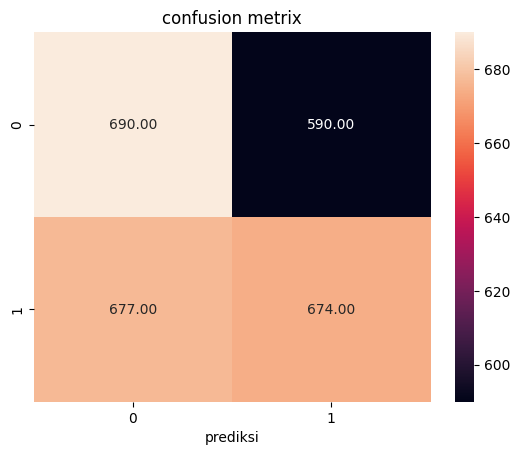

In [24]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.xlabel('prediksi')
plt.title('confusion metrix')
cm

,precision,recall,f1-score,support
Glaucoma,0.504755,0.539062,0.521345,1280.000000
No Glaucoma,0.533228,0.498890,0.515488,1351.000000
accuracy,0.518434,0.518434,0.518434,0.518434
macro avg,0.518991,0.518976,0.518416,2631.000000
weighted avg,0.519376,0.518434,0.518337,2631.000000


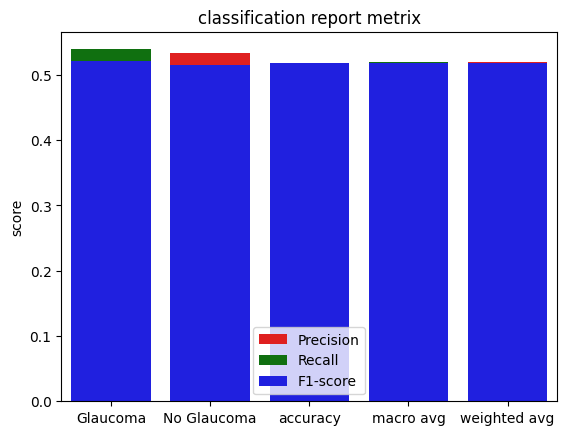

In [25]:
report=classification_report(y_test,y_pred,output_dict=True)
df_report=pd.DataFrame(report).transpose()
sns.barplot(x=df_report.index,y=df_report['precision'],label='Precision',color='red')
sns.barplot(x=df_report.index,y=df_report['recall'],label='Recall',color='green')
sns.barplot(x=df_report.index,y=df_report['f1-score'],label='F1-score',color='blue')
plt.title('classification report metrix')
plt.ylabel('score')
plt.legend()
df_report